# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.728127e+01     1.399651e+01
 * time: 0.00179290771484375
     1     3.146681e+01     9.285856e+00
 * time: 0.007576942443847656
     2     2.636220e+01     3.684636e+00
 * time: 0.041905879974365234
     3     2.205811e+01     2.627680e+00
 * time: 0.04697394371032715
     4     2.078411e+01     3.459568e+00
 * time: 0.052278995513916016
     5     1.984401e+01     2.693317e+00
 * time: 0.05765795707702637
     6     1.942229e+01     2.912428e+00
 * time: 0.06221485137939453
     7     1.883309e+01     2.272177e+00
 * time: 0.06686806678771973
     8     1.842981e+01     2.095921e+00
 * time: 0.0712890625
     9     1.813043e+01     9.884813e-01
 * time: 0.07582497596740723
    10     1.792924e+01     1.022083e+00
 * time: 0.08034992218017578
    11     1.780365e+01     8.773878e-01
 * time: 0.0849599838256836
    12     1.776635e+01     1.501687e+00
 * time: 0.08859705924987793
    13     1.771607e+01     8.889835e-01
 * time: 0.09

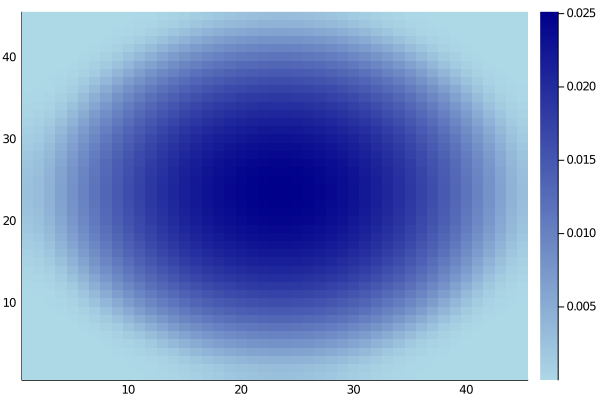

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)